<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Evaluating-Final-Models" data-toc-modified-id="Evaluating-Final-Models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Evaluating Final Models</a></span><ul class="toc-item"><li><span><a href="#Words-with-the-most-Importance:-Logistic-Regression-Model" data-toc-modified-id="Words-with-the-most-Importance:-Logistic-Regression-Model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Words with the most Importance: Logistic Regression Model</a></span></li><li><span><a href="#Words-with-the-most-Importance:-Multinomial-Naive-Bayes" data-toc-modified-id="Words-with-the-most-Importance:-Multinomial-Naive-Bayes-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Words with the most Importance: Multinomial Naive Bayes</a></span></li><li><span><a href="#Analysis-of-Barplots-and-Wordclouds" data-toc-modified-id="Analysis-of-Barplots-and-Wordclouds-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Analysis of Barplots and Wordclouds</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Recommendations</a></span></li></ul></div>

In [31]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [32]:
# Define our wordcloud creating function
def create_and_show_wordcloud_w_freq(words, bg_color, word_colormap):
    '''
    Function creates a wordcloud with colours defined.
    words: dict of words: frequency to use in the wordcloud.
    bg_color: matplotlib colour to use for background
    word_colormap: matplotlib colormap to use for words
    '''
    wordcloud_whole = WordCloud(width=800, height=400, max_words=35, \
                      stopwords = STOPWORDS, background_color=bg_color, colormap=word_colormap, \
                      collocations=False).generate_from_frequencies(words)
    plt.figure(figsize=(13,13))
    plt.imshow(wordcloud_whole, interpolation='bilInear')
    # No axes for wordclouds
    plt.axis('off')
    # Show wordcloud
    plt.show()

## Evaluating Final Models

In [37]:
lgr_words = pd.read_csv('../datasets/words_lem_count_lgr.csv')
nb_adhd = pd.read_csv('../datasets/words_adhd_lem_tf_nb.csv')
nb_ocd = pd.read_csv('../datasets/words_ocd_lem_tf_nb.csv')

### Words with the most Importance: Logistic Regression Model

Logistic Regression ranks words according to their coefficients. A positive coefficient indicates that the word makes the odds of the text being classified as r/OCD higher, while a negative coefficient indicates the same for r/ADHD. Words shared between the two will indicate neither class, diluting their coefficient to one of a smaller magnitude.

In [38]:
lgr_words.head()

,word,coefficient
0,00,-0.033031
1,000,-0.143556
2,10,-0.119434
3,100,0.234476
4,100mg,-0.020622


We will use a barplot to visualize our words against their coefficients here.

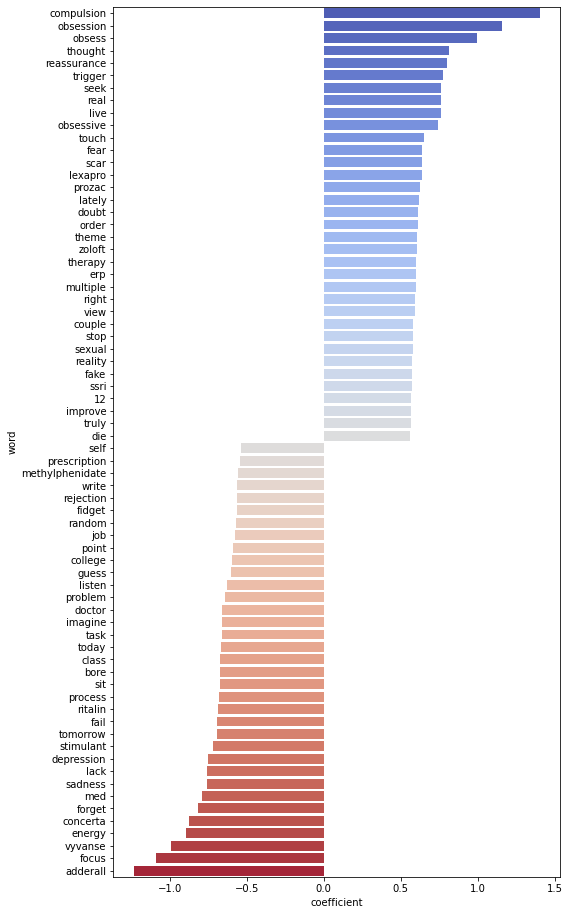

In [46]:
plt.figure(figsize=(8,16))
sns.barplot(data=lgr_words.sort_values(by='coefficient', ascending=False).iloc[np.r_[0:35, -35:0]], y='word', x='coefficient', orient='h', palette='coolwarm')
plt.show()

In this case, it may be better to use wordclouds to show their relative importance instead.

In [6]:
lgr_words.set_index('word', inplace=True)

In [7]:
# Exponentiate the coefficients so that the wordcloud has a linearly increasing sequence of numbers to determine the rank
# of size of each word. These are the words which being a post closer to being predicted as being from r/OCD.
lgr_words['exp_coefs'] = np.exp(lgr_words['coefficient'])

# Do the same for the inverse.
# These are the words which being a post closer to being predicted as being from  r/ADHD.
lgr_words['exp_coefs_inverse'] = (1/lgr_words['exp_coefs'])

In [8]:
dict_lgr_ocd = lgr_words[['exp_coefs']].to_dict()['exp_coefs']
dict_lgr_adhd = lgr_words[['exp_coefs_inverse']].to_dict()['exp_coefs_inverse']

We will now take a look at the top 35 predictive words of each class from Logistic Regression.

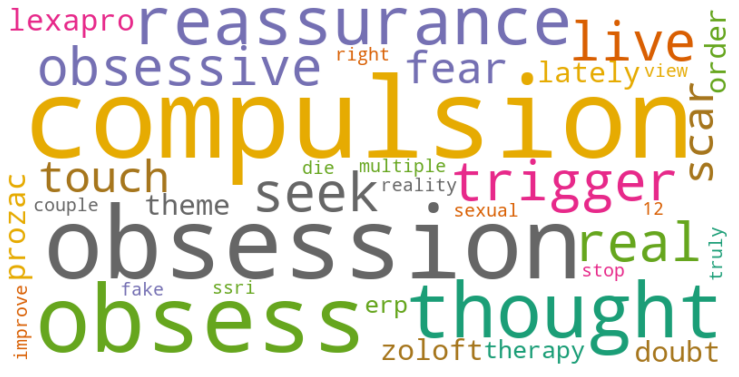

In [9]:
create_and_show_wordcloud_w_freq(dict_lgr_ocd, 'white', 'Dark2')
# For r/OCD

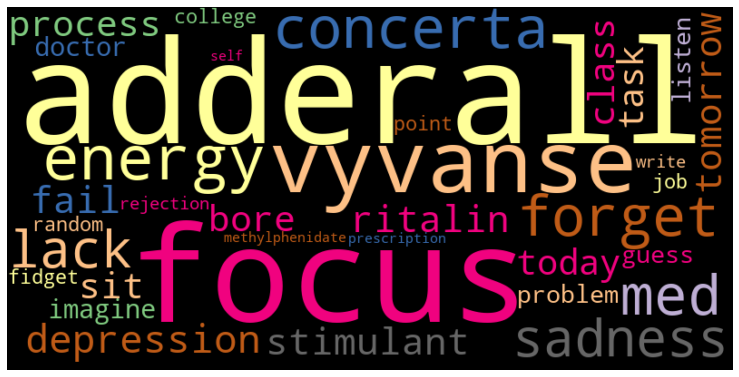

In [10]:
create_and_show_wordcloud_w_freq(dict_lgr_adhd, 'black', 'Accent')
# For r/ADHD

### Words with the most Importance: Multinomial Naive Bayes

For Multinomial Naive Bayes, the probabilities are determined. The probabilities equate to: given the post belongs to r/ADHD' or r/OCD, what is the probability of a certain word being present? Because of this we know that there will definitely be words shared between the two which a high probaibility.

We will use barplots to represent our words against their log probabilities. A larger number (smaller negative) indicates a larger probability, and as such, more importance.

**For ADHD**

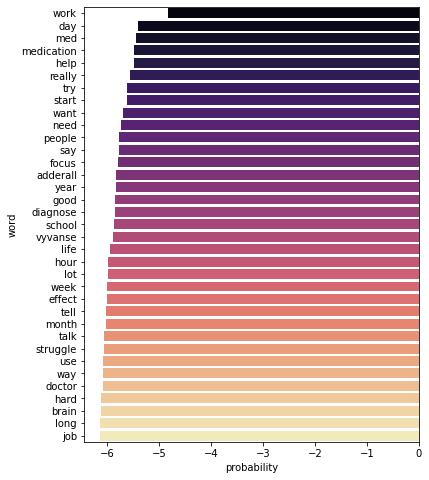

In [56]:
plt.figure(figsize=(6,8))
sns.barplot(data=nb_adhd.sort_values(by='probability', ascending=False).iloc[np.r_[0:35]], y='word', x='probability', orient='h', palette='magma')
plt.show()

**For OCD**

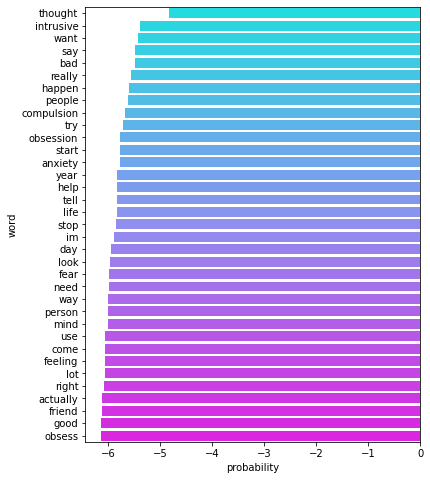

In [57]:
plt.figure(figsize=(6,8))
sns.barplot(data=nb_ocd.sort_values(by='probability', ascending=False).iloc[np.r_[0:35]], y='word', x='probability', orient='h', palette='cool')
plt.show()

Again, it may be better to represent our word importances in wordclouds instead.

In [11]:
nb_ocd.set_index('word', inplace=True)
nb_adhd.set_index('word', inplace=True)

In [12]:
# Exponentiate the log probabilties so that the wordcloud has a linearly increasing sequence of numbers to determine the rank
# of size of each word.
nb_ocd['exp_prob'] = np.exp(nb_ocd['probability'])
nb_adhd['exp_prob'] = np.exp(nb_adhd['probability'])

In [13]:
dict_nb_ocd = nb_ocd[['exp_prob']].to_dict()['exp_prob']
dict_nb_adhd = nb_adhd[['exp_prob']].to_dict()['exp_prob']

We will now take a look at the top 35 words being present in each class.

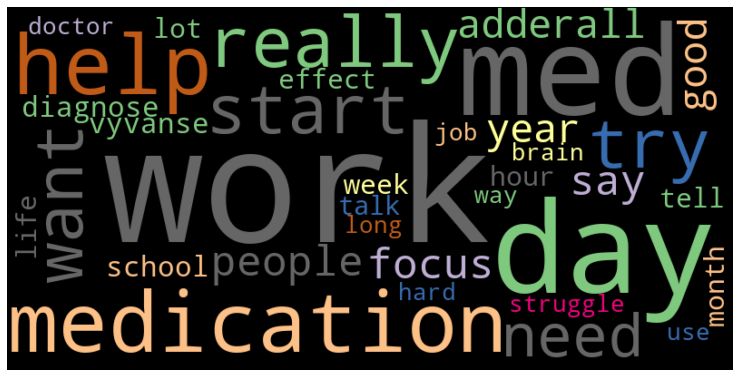

In [14]:
create_and_show_wordcloud_w_freq(dict_nb_adhd, 'black', 'Accent')
# For r/ADHD

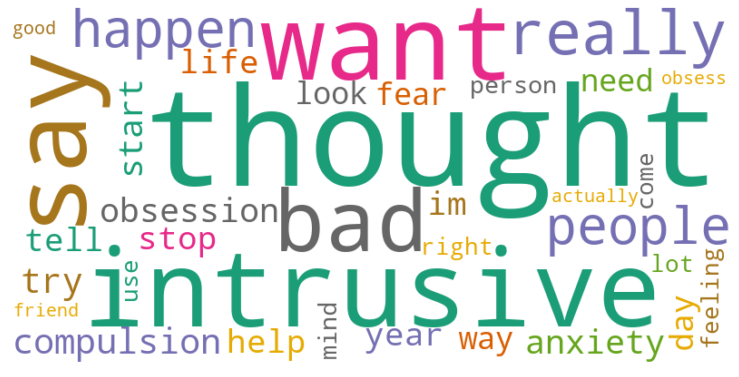

In [15]:
create_and_show_wordcloud_w_freq(dict_nb_ocd, 'white', 'Dark2')
# For r/OCD

### Analysis of Barplots and Wordclouds
As expected in our introduction section, what we see is that posts are highly separable when very specific features are found in them.

**Logistic Regression**

For r/ADHD, the most common features appear to be ADHD medication -- 'Adderall', 'Vyvanse', 'Concerta' and 'Ritalin' are all very obvious examples of this. For r/OCD, medication does appear as well ('Prozac', 'Lexapro', 'Zoloft'), but they are less important than users describing their experience via the key words 'obsession', 'compulsion', etc.

**Multinomial Naive Bayes**

As described above, Naive Bayes simply tells us the probability of each feature appearing given it is a post from a certain subreddit. We can see that the wordclouds generated from Naive Bayes probabilities, while containing many similar words to those produced by Logistic Regression, predicts some more non-specific words have an importance for each post. Many of these words are likely shared between both r/ADHD and r/OCD posts. 

Let's take a quick look at which these are.

In [16]:
# Print words shared in the top 100 probability words of r/OCD and r/ADHD
shared_words = list(set(nb_ocd.index) & set(nb_adhd.index))
print(shared_words)

['year', 'guy', 'recently', 'good', 'little', 'start', 'lot', 'stop', 'hard', 'life', 'use', 'lose', 'brain', 'sure', 'look', 'sleep', 'way', 'symptom', 'felt', 'month', 'say', 'help', 'right', 'ago', 'want', 'talk', 'read', 'question', 'actually', 'happen', 'hour', 'come', 'post', 'tell', 'struggle', 'ask', 'long', 'experience', 'try', 'need', 'really', 'work', 'week', 'fuck', 'new', 'remember', 'day', 'people', 'end', 'bad', 'anxiety']


The highest probability word for ADHD, 'work' is actually a word shared between posts in both subreddits. This indicates that while someone writing about OCD may complain about trouble at work, it is much more likely that it is someone writing about ADHD doing so.

This brings us to understand a greater trend: redditors writing about ADHD tend to talk about things done (or forgotten to be done, like 'work', 'school', 'focus', 'job', etc.), while those about OCD tend to talk about the nature of their thoughts ('thought', 'instrusive', 'anxiety', etc.). People writing about ADHD also tend to discussion details of their medication regime more than those writing about OCD.

This may be due to the perception, at least in the USA, that [for ADHD, medication is the most effective route](https://www.healthline.com/health/adhd/treatment-overview#therapy-and-training), while [for OCD, therapy is most effective](https://www.healthline.com/health/therapy-for-ocd). Normally, patients of both conditions will be prescribed a combination of both depending on the severity of their conditions.

Conspicuously, we note that 'work' is completely missing in the 35 most important words produced by the Logistic Regression model. We note that this is because Multinomial Naive Bayes, unlike Logistic Regression, identifies how important shared words between the two matter in predicting each class. Logistic Regression cannot do this due to a shared word which predicts both classes strongly becomes instead a weak predictor.

In [25]:
lgr_words.loc[['work', 'adderall', 'compulsion'], 'coefficient']

word
work         -0.261435
adderall     -1.233858
compulsion    1.400444
Name: coefficient, dtype: float64

In [27]:
nb_adhd.loc[['work', 'adderall'], 'exp_prob']

word
work        0.008017
adderall    0.002934
Name: exp_prob, dtype: float64

_Above: Work is a weak coefficient in Logistic Regression but a strong probability predictor for ADHD in M Naive Bayes._

While both r/ADHD and r/OCD subredditors wrote most commonly about their feelings and experiences, there were many words which would highly indicate to our chat bot which condition they are likely to be experiencing about even if not explicitly mentioned, or if misdiagnosed by the enquirer himself.

## Conclusions
In this project, we have managed to resolve all 3 of our data science problems stated in our Introduction section:

1. We have found 35 of the most important words for predicting if a post belongs to each class from our models.
2. We can determine their relative importance from their coefficients and log probabilities.
3. We see that redditors writing about ADHD tend to talk about things done (or forgotten to be done, like 'work', 'school', 'focus', 'job', etc.), while those about OCD tend to talk about the nature of their thoughts ('thought', 'instrusive', 'anxiety', etc.).

All this information will be invaluable in training out chat bot to accurately predict the context of enquiries.

We also conclude that as a model, our Naive Bayes classifier performs a better job and gives better insights into what participants may share when dicussing their problems with our chat bot. In other words, it is better optimized for inference than the Logistic Regression classifier model.

It is the hope of the ABC Research Group that our first iteration of this chat bot will create financial and time savings for Department of Psychology and save time for enquirers requiring the Department's services during these trying times.

## Recommendations

The next important feature which our chat bot will have to address is: Is this someone with a background/has been diagnosed before, or is looking to be diagnosed? Answering this question may not be possible with our current models because both Count and TF-IDF vectorizers share a common weakness: that they do not care about the ordering of words. This will make it impossible to distinguish between:  

'I need to buy Concerta for my ADHD.' and,  
'Is Concerta good for my ADHD?'

The former indicates someone who is likely already diagnosed and has a prescription and should be led to the department's drug administrator, while the latter is someone who is likely exploring his issues and should be directed to a psychiatrist's office instead.

To solve this issue, we will next look into algorithms which retain information of how close certain words are to others like [GloVe](https://nlp.stanford.edu/projects/glove/) and [Word2Vec](https://en.wikipedia.org/wiki/Word2vec) to improve upon this function.